In [1]:
import matplotlib.pyplot as plt
import os

import numpy as np
import itertools
from glob import glob
import pandas as pd
from itertools import product
import os

from annsa.model_classes import f1
from tensorflow.python.keras.models import load_model
from pandas import read_csv
from sklearn.metrics import auc

from matplotlib.lines import Line2D

Using TensorFlow backend.


#### Import model, training function 

In [2]:
def plot_learning_curve_points(sizes, errors, label='None', linestyle='-', color='k', marker='.', linewidth=2):
    '''
    Plots the learning curve. 
    
    Inputs:
        sizes : list, int
            List of traning dataset sizes
        errors : list, float 
            List of final errors for some metric
    
    
    '''
    average = np.average(errors, axis=1)
    std = np.var(errors)
    plt.plot(sizes, average, label=label, linestyle=linestyle, color=color, linewidth=linewidth,)
    plt.scatter(np.array([[size]*5 for size in sizes]).flatten(),
                np.array(errors).flatten(),
                color=color,
                marker=marker)

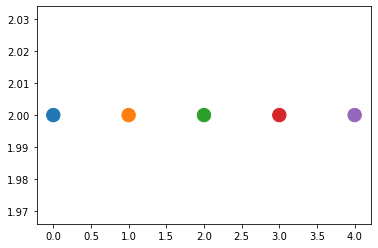

In [3]:
import matplotlib.colors

def categorical_cmap(nc, nsc, cmap="tab10", continuous=False):
    if nc > plt.get_cmap(cmap).N:
        raise ValueError("Too many categories for colormap.")
    if continuous:
        ccolors = plt.get_cmap(cmap)(np.linspace(0,1,nc))
    else:
        ccolors = plt.get_cmap(cmap)(np.arange(nc, dtype=int))
    cols = np.zeros((nc*nsc, 3))
    for i, c in enumerate(ccolors):
        chsv = matplotlib.colors.rgb_to_hsv(c[:3])
        arhsv = np.tile(chsv,nsc).reshape(nsc,3)
        arhsv[:,1] = np.linspace(chsv[1],0.25,nsc)
        arhsv[:,2] = np.linspace(chsv[2],1,nsc)
        rgb = matplotlib.colors.hsv_to_rgb(arhsv)
        cols[i*nsc:(i+1)*nsc,:] = rgb       
    cmap = matplotlib.colors.ListedColormap(cols)
    return cmap

c1 = categorical_cmap(5,1, cmap="tab10")
plt.scatter(np.arange(5*1),np.ones(5*1)+1, c=np.arange(5*1), s=180, cmap=c1)


In [4]:
line_colors = {'caednn' : c1.colors[0],
               'daednn' : c1.colors[1],
               'dnn' : c1.colors[2],
               'cnn' : c1.colors[3],
              }

line_styles = {'test' : '-',
               'train' : '--',}

marker_styles = {'test' : '',
                 'train' : '',}

In [5]:
dependencies = {'f1' : f1}

# All models Full

([<matplotlib.axis.XTick at 0x7f3868412b00>,
 <a list of 5 Text xticklabel objects>)

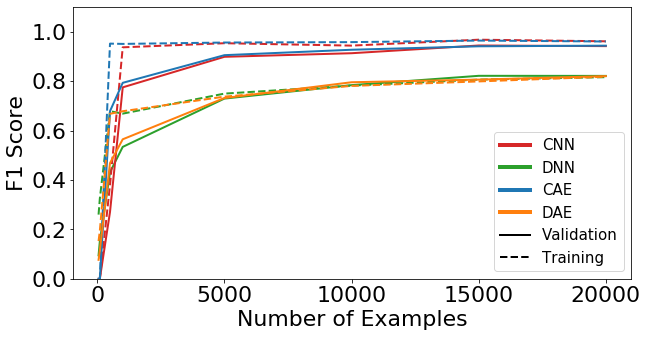

In [19]:
plt.figure(figsize=(10,5))
matplotlib.rcParams.update({'font.size': 22})
dataset_modes = ['test', 'train']
models = [
    'dnn',
    'cnn',
    'caednn',
    'daednn',
]
model_modes = ['full']
train_sizes = [
    '50',
    '100',
    '500',
    '1000',
    '5000',
    '10000',
    '15000',
    '20000',
    ]

errors_all = {}

for model, model_mode, dataset_mode in product (models, model_modes, dataset_modes):
    if dataset_mode == 'train':
        loss = 'f1'
    else:
        loss = 'val_f1'

    errors = []
    for train_size in train_sizes:
        tmp_error = []
        
        identifier = '-final_trainsize'
        if model == 'cnn':
            identifier = '-final-reluupdate_trainsize'
        
        
        file_path = os.path.join(
            '..',
            'final_training_notebooks',
            'final-models-keras',
            'learningcurve-'+model+'-'+model_mode+identifier+train_size+'_'+'*.log',)
        for tmp_file_path in glob(file_path):
            history_temp = read_csv(tmp_file_path)
            tmp_error.append(history_temp.tail(1).iloc[0][loss])
        errors.append(np.array(tmp_error))
    errors = np.array(errors)
    errors_all[dataset_mode + '_' + model] = np.average(errors, axis=1)
    plot_learning_curve_points([int(train_size) for train_size in train_sizes],
                               errors,
                               label=model+' '+dataset_mode+'ing set',
                               linestyle=line_styles[dataset_mode],
                               color=line_colors[model],
                               marker=marker_styles[dataset_mode],
                               linewidth=2)

custom_lines = [Line2D([0], [0], color=c1.colors[3], lw=4),
                Line2D([0], [0], color=c1.colors[2], lw=4),
                Line2D([0], [0], color=c1.colors[0], lw=4),
                Line2D([0], [0], color=c1.colors[1], lw=4),
                Line2D([0], [0], color='k', linestyle=line_styles['test'], marker=marker_styles['test'], markersize=15, lw=2),
                Line2D([0], [0], color='k', linestyle=line_styles['train'], marker=marker_styles['train'], markersize=15, lw=2),
               ]
plt.legend(custom_lines,
           ['CNN', 'DNN', 'CAE', 'DAE', 'Validation', 'Training'], 
           prop={'size': 15})

plt.ylim([0,1.1])
plt.xlabel('Number of Examples')
plt.ylabel('F1 Score')
plt.xticks([0, 5000, 10000, 15000, 20000], [0, 5000, 10000, 15000, 20000])

In [39]:
for item in errors_all:
    print(item, round((auc([int(train_size) for train_size in train_sizes], errors_all[item]))/20000., 2))

test_dnn 0.74
train_dnn 0.76
test_cnn 0.88
train_cnn 0.93
test_caednn 0.89
train_caednn 0.94
test_daednn 0.74
train_daednn 0.76


# All models Easy

([<matplotlib.axis.XTick at 0x7f3868335a20>,
 <a list of 5 Text xticklabel objects>)

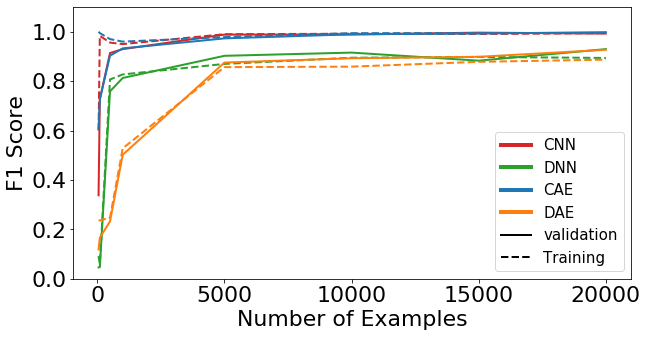

In [40]:
plt.figure(figsize=(10,5))

dataset_modes = ['test', 'train']
models = [
    'dnn',
    'cnn',
    'caednn',
    'daednn',
]
model_modes = ['easy']
train_sizes = [
    '50',
    '100',
    '500',
    '1000',
    '5000',
    '10000',
    '15000',
    '20000',
    ]


for model, model_mode, dataset_mode in product (models, model_modes, dataset_modes):
    if dataset_mode == 'train':
        loss = 'f1'
    else:
        loss = 'val_f1'

    errors = []
    for train_size in train_sizes:
        tmp_error = []
        identifier = '-final_trainsize'
        if model == 'cnn':
            identifier = '-final-reluupdate_trainsize'
        file_path = os.path.join(
            '..',
            'final_training_notebooks',
            'final-models-keras',
            'learningcurve-'+model+'-'+model_mode+identifier+train_size+'_'+'*.log',)
        for tmp_file_path in glob(file_path):
            history_temp = read_csv(tmp_file_path)
            tmp_error.append(history_temp.tail(1).iloc[0][loss])
        errors.append(np.array(tmp_error))
    errors = np.array(errors)
    errors_all[dataset_mode + '_' + model] = np.average(errors, axis=1)
    
    plot_learning_curve_points([int(train_size) for train_size in train_sizes],
                               errors,
                               label=model+' '+dataset_mode+'ing set',
                               linestyle=line_styles[dataset_mode],
                               color=line_colors[model],
                               marker=marker_styles[dataset_mode],
                               linewidth=2)

custom_lines = [Line2D([0], [0], color=c1.colors[3], lw=4),
                Line2D([0], [0], color=c1.colors[2], lw=4),
                Line2D([0], [0], color=c1.colors[0], lw=4),
                Line2D([0], [0], color=c1.colors[1], lw=4),
                Line2D([0], [0], color='k', linestyle=line_styles['test'], marker=marker_styles['test'], markersize=15, lw=2),
                Line2D([0], [0], color='k', linestyle=line_styles['train'], marker=marker_styles['train'], markersize=15, lw=2),
               ]
plt.legend(custom_lines,
           ['CNN', 'DNN', 'CAE', 'DAE', 'validation', 'Training'], 
           prop={'size': 15})
plt.ylim([0,1.1])
plt.xlabel('Number of Examples')
plt.ylabel('F1 Score')
plt.xticks([0, 5000, 10000, 15000, 20000], [0, 5000, 10000, 15000, 20000])

In [41]:
for item in errors_all:
    print(item, round((auc([int(train_size) for train_size in train_sizes], errors_all[item]))/20000., 2))

test_dnn 0.88
train_dnn 0.87
test_cnn 0.98
train_cnn 0.98
test_caednn 0.97
train_caednn 0.98
test_daednn 0.82
train_daednn 0.81
